In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
dic='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
rg_sed=np.genfromtxt(dic+'RG_sed.txt')
rg_catalog=np.genfromtxt(dic+'RG_catalog.txt')
ind=rg_sed[:,0]
wave=rg_sed[:,1]
flux=rg_sed[:,2]

In [3]:
def sed_split(ind_arr,wave,flux):
    '''
    split the sed in one array in to individuals and 
    return wavelength list and flux list
    '''
    
    wave_list,flux_list,id_list=[],[],[]
    ind=np.unique(ind_arr)
    for i in ind:
        wave_list.append(wave[ind_arr==i])
        flux_list.append(flux[ind_arr==i])
        id_list.append(i)
    
    return wave_list, flux_list,id_list

def redshift_correction(wave_list,id_list,rg_catalog):
    '''
    shift the sed to rest frame
    return shifted wavelength, rg_catalog
    is the catalog of sources including
    redshift of sources
    '''
    wave_list_shift=np.zeros_like(wave_list)
    for i in range(id_list.shape[0]):
        correct_factor=rg_catalog[rg_catalog[:,0]==id_list[i],-1]+1
        wave_list_shift[i,:]=wave_list[i,:]/correct_factor
    return wave_list_shift

def normalized(wave,flux,wave0,delta=0.5):
    '''
    normalize flux with a flux of wave0,
    delta is the interval size used to locate
    wave0. 
    return normalized flux array
    '''
    
    for i in range(wave.shape[0]):
        
        flux[i]=flux[i]/flux[i,np.abs(wave[i]-100)<.5][0]
        
    return flux
    

In [4]:
wave_list,flux_list,id_list=sed_split(ind,wave,flux)
wave_list,flux_list,id_list=np.array(wave_list),np.array(flux_list),np.array(id_list)
wave_list,flux_list=wave_list[:,500:],flux_list[:,500:]

In [5]:
#normalize flux and shift wavelength
flux_list=normalized(wave_list,flux_list,100)
wave_list_shifted=redshift_correction(wave_list,id_list,rg_catalog)

In [6]:
#calculate the mean RG sed template
flux_rg_template=flux_list.mean(axis=0)
wave_rg_template_shift=wave_list_shifted.mean(axis=0)

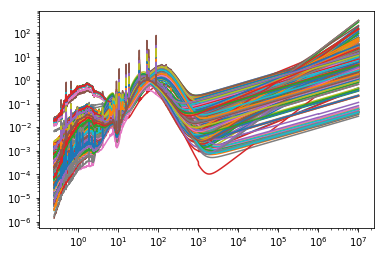

In [9]:
fig,ax=plt.subplots(1,1)
for i in range(flux_list.shape[0]):
    ax.plot(wave_list_shifted[i],
            flux_list[i])
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

In [28]:
rg_sed_template=np.vstack([wave_rg_template_shift,flux_rg_template]).T

In [29]:
dicf='/Users/shiwuzhang/WS/ASTRO/MAMMOTH_KCWI/'
np.savetxt(dicf+'rg_sed_template.txt',rg_sed_template,fmt='%10.15f')